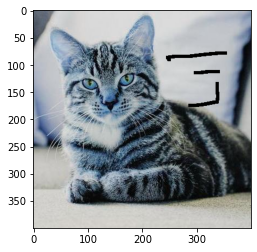

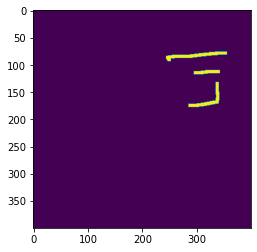

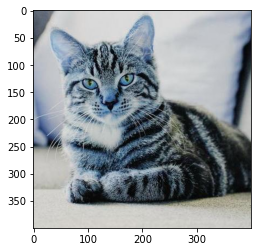

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('cat.png')
plt.imshow(img)
plt.show()

mask=cv2.imread('cat_mask.png',0)
plt.imshow(mask)
plt.show()
dst=cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
cv2.imwrite('cat2.png',dst)
plt.imshow(dst)
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)

In [14]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis=('off')

def plot_comparision(img_original, img_filtered, img_title_filterd):
    fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(10,8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title('img_title_filtered')
    ax2.axis('off')

In [17]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

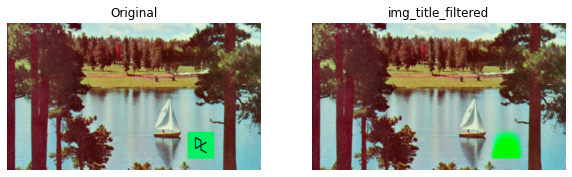

In [18]:
image_with_logo=plt.imread('logo.png')
mask=np.zeros(image_with_logo.shape[:-1])
mask[210:272,360:425]=1
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo, mask, multichannel=True)
plot_comparision(image_with_logo, image_logo_removed, 'Image with logo removed')

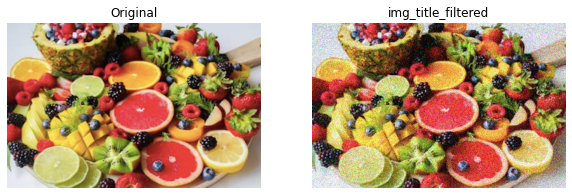

In [20]:
from skimage.util import random_noise
fruit_image=plt.imread('fruit.jpg')
noisy_image=random_noise(fruit_image)
plot_comparision(fruit_image, noisy_image, 'Noisy image')

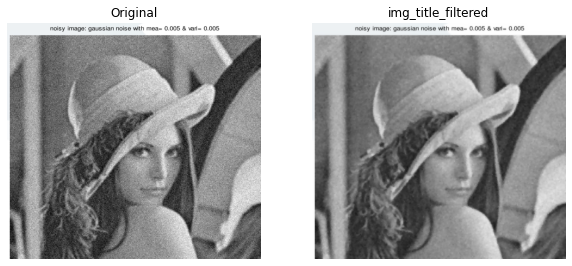

In [23]:
from skimage.restoration import denoise_tv_chambolle
noisy_image=plt.imread('noise.png')
denoised_image=denoise_tv_chambolle(noisy_image, multichannel=True)
plot_comparision(noisy_image, denoised_image, 'Denoised Image')

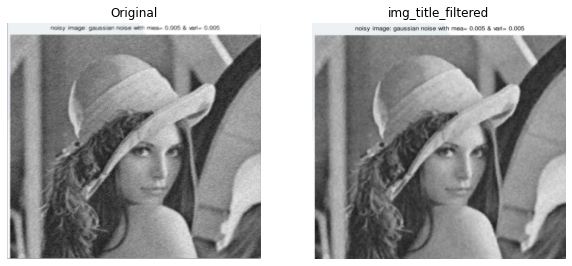

In [26]:
from skimage.restoration import denoise_bilateral
landscape_image=plt.imread('noise.png')
landscape_image=denoise_bilateral(landscape_image, multichannel=True)
plot_comparision(landscape_image, denoised_image, 'Denoised Image')

C:\Users\User\AppData\Local\Temp/ipykernel_9228/469910870.py:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(face_image,n_segments=400)
C:\Users\User\AppData\Local\Temp/ipykernel_9228/469910870.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments, face_image, kind='avg')


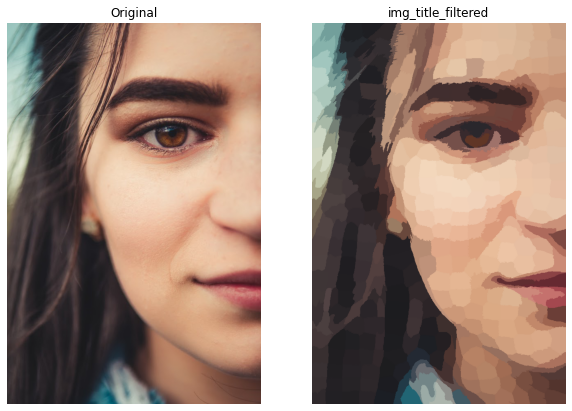

In [27]:
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image=plt.imread('face.jpg')
segments=slic(face_image,n_segments=400)
segmented_image=label2rgb(segments, face_image, kind='avg')

plot_comparision(face_image.astype('uint8'), segmented_image.astype('uint8'), 'segmented image, 400 superpixels')

In [28]:
def show_image_contour(image, contour):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:,1], contour[:,0],linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('contours')
    plt.axis('off')

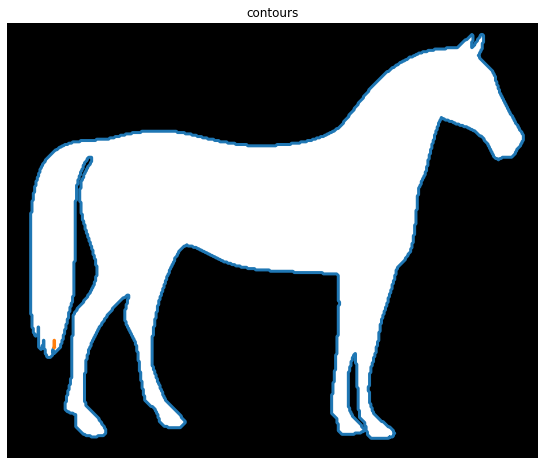

In [31]:
from skimage import measure, data
horse_image=data.horse()
contours=measure.find_contours(horse_image, level=0.8)
show_image_contour(horse_image, contours)

In [33]:
from skimage.io import imread
from skimage.filters import threshold_otsu

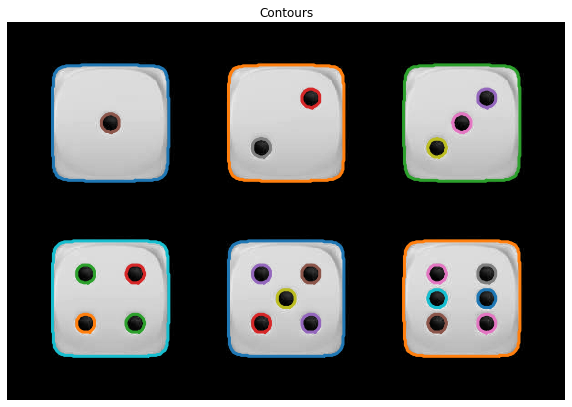

In [55]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')


from skimage.io import imread
from skimage.filters import threshold_otsu
image_dices = imread('dices1.jpg')
image_dices = color.rgb2gray(image_dices)
thresh = threshold_otsu(image_dices)
binary = image_dices > thresh
contours = measure.find_contours(binary, level=0.8)
show_image_contour(image_dices, contours)

dice`s dots in no.21.


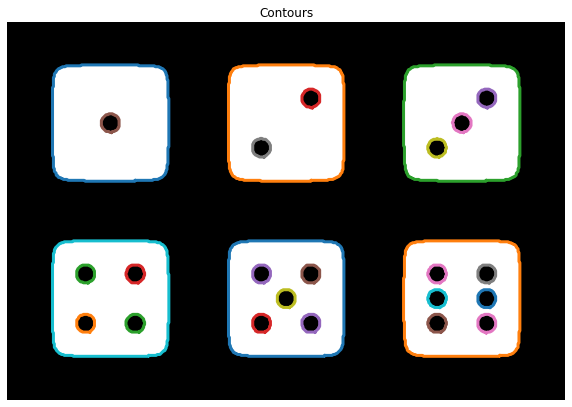

In [57]:
shape_contours=[cnt.shape[0] for cnt in contours]
max_dots_shape=200
dots_contours=[cnt for cnt in contours if np.shape(cnt)[0]<max_dots_shape]
show_image_contour(binary, contours)
print('dice`s dots in no.{}.'.format(len(dots_contours)))